### Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder


### Data gather and cleaning

In [2]:
churnData= pd.read_csv("DATA_Customer-Churn.csv")


In [3]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'],errors='coerce')


In [4]:
nulls_df = pd.DataFrame(round(churnData.isna().sum()/len(churnData),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,gender,0.00
1,SeniorCitizen,0.00
2,Partner,0.00
3,Dependents,0.00
4,tenure,0.00
5,PhoneService,0.00
6,OnlineSecurity,0.00
7,OnlineBackup,0.00
8,DeviceProtection,0.00
9,TechSupport,0.00


In [5]:
mean_totalcharges= np.mean(churnData["TotalCharges"])
churnData["TotalCharges"]= churnData["TotalCharges"].fillna(mean_totalcharges)
churnData["TotalCharges"]

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [6]:
#X= churnData[["SeniorCitizen","tenure","MonthlyCharges"]]
Y= churnData[["Churn"]]
X= churnData[["SeniorCitizen","tenure","MonthlyCharges","TotalCharges"]]


In [41]:
Y= (churnData[["Churn"]].replace("Yes",1)).replace("No",0)
Y.value_counts()


Churn
0        5174
1        1869
dtype: int64

### Logistic Regression

In [8]:
log = LogisticRegression(random_state=0) 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=11)


trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log.fit(X_train, y_train)

y_pred_train_log = log.predict(X_train_mod)

y_pred_test_log = log.predict(X_test_mod)



E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,Error_metric,Train,Test
0,Accuracy,0.710330,0.696948
1,Precision,0.421927,0.397490
2,Recall,0.255533,0.251323


E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Confusion matrix for the train set
[[3621  522]
 [1110  381]]


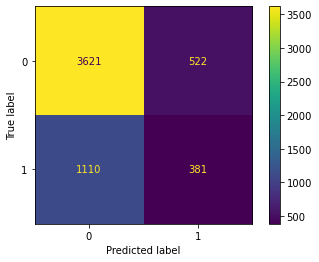



Confusion matrix for the test set
[[887 144]
 [283  95]]


E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


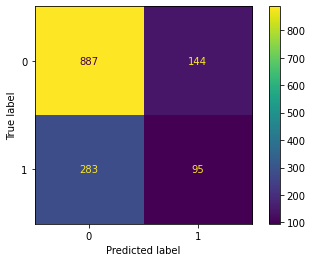

In [9]:

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()


In [10]:
scores=cross_val_score(log, X_train, y_train, cv=10)
scores


E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

array([0.78546099, 0.7712766 , 0.79078014, 0.80319149, 0.79040853,
       0.78507993, 0.79396092, 0.79396092, 0.77264654, 0.80817052])

In [11]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.01


In [12]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.01


### Decision Trees

,Error_metric,Train,Test
0,Accuracy,0.784523,0.784244
1,Precision,0.647184,0.672897
2,Recall,0.408451,0.380952


Confusion matrix for the train set
[[3811  882]
 [ 332  609]]


E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


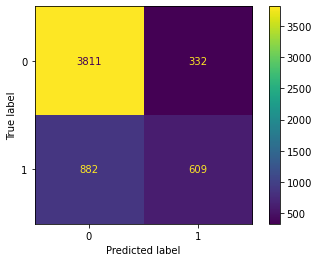



Confusion matrix for the test set
[[961 234]
 [ 70 144]]


E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


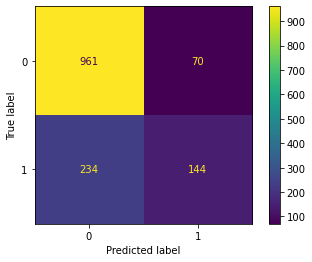

In [13]:
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

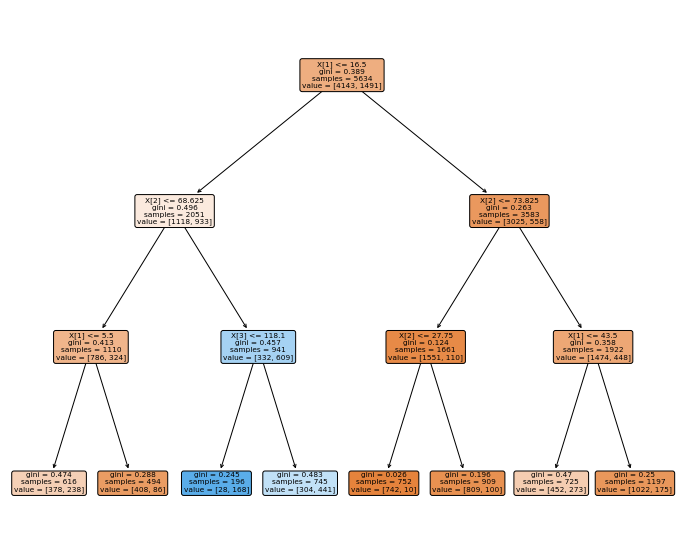

In [14]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,10))

plot_tree(dt,filled = True, rounded=True)
plt.show() 

In [15]:
scores=cross_val_score(dt, X_train, y_train, cv=5)
scores

array([0.77196096, 0.78881988, 0.78438332, 0.77639752, 0.78952043])

### Decision Tree classifier

In [16]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.7224982256919801

In [17]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.72049689, 0.72315883, 0.71872227, 0.74800355, 0.72646536])

In [18]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.73 accuracy with a standard deviation of 0.01


In [19]:
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
y_pred

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [21]:
decision_tree = DecisionTreeClassifier()

logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()


model_pipeline = [decision_tree, logistic_regression,random_forest]
model_names = ['Decision Tree', 'Logistic Regression', 'random_forest']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'Decision Tree': 0.7245303001886522, 'Logistic Regression': 0.7905580921070258, 'random_forest': 0.7692593077079468}


### Random Forest Classifier

In [22]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

C:\Users\kondo\AppData\Local\Temp/ipykernel_4360/3771721527.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


0.7679205110007097


### With upsampling using SMOTE

In [42]:
X_sm, y_sm = SMOTE.fit_resample(X,Y)
y_sm.value_counts()

TypeError: fit_resample() missing 1 required positional argument: 'y'

In [43]:
log = LogisticRegression() 

X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.20, random_state=1000)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log.fit(X_train_mod, y_train)

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)


E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Error_metric,Train,Test
0,Accuracy,0.786297,0.806246
1,Precision,0.644841,0.700000
2,Recall,0.434492,0.469169


Confusion matrix for the train set
[[3780  358]
 [ 846  650]]


E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


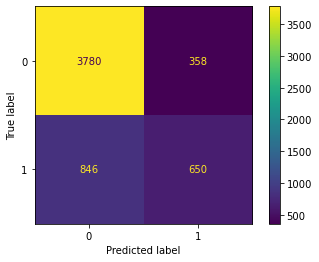



Confusion matrix for the test set
[[961  75]
 [198 175]]


E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


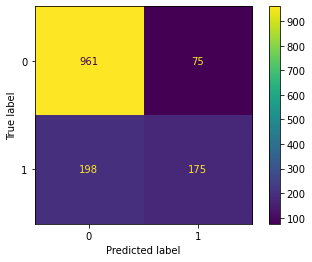

In [44]:

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                        precision_score(y_train, y_pred_train_log),
                                        recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})
display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()

In [45]:
scores=cross_val_score(log, X_train, y_train, cv=10)
scores

E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

array([0.78191489, 0.79609929, 0.7748227 , 0.79432624, 0.79218472,
       0.74777975, 0.77619893, 0.80994671, 0.79573712, 0.79573712])

In [46]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.02


,Error_metric,Train,Test
0,Accuracy,0.784523,0.784244
1,Precision,0.647184,0.672897
2,Recall,0.408451,0.380952


Confusion matrix for the train set
[[3811  882]
 [ 332  609]]


E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


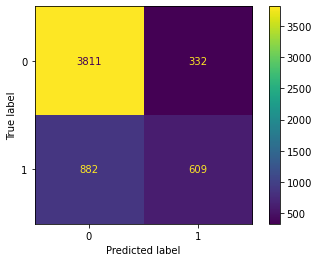



Confusion matrix for the test set
[[961 234]
 [ 70 144]]


E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


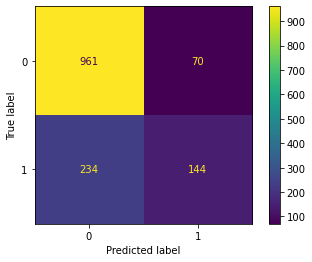

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(min_samples_leaf=400,max_depth=4)# min_samples_leaf nos indica la cantidad minima de elementos que estarán incluidos en la leaf final
                                                            # min_samples_leaf es una buena medida para evitar el overfeeting en el modelo. 
                                                            # en el modelo de regression usamos Lasso o Ridge para evitar el overfeeting
dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

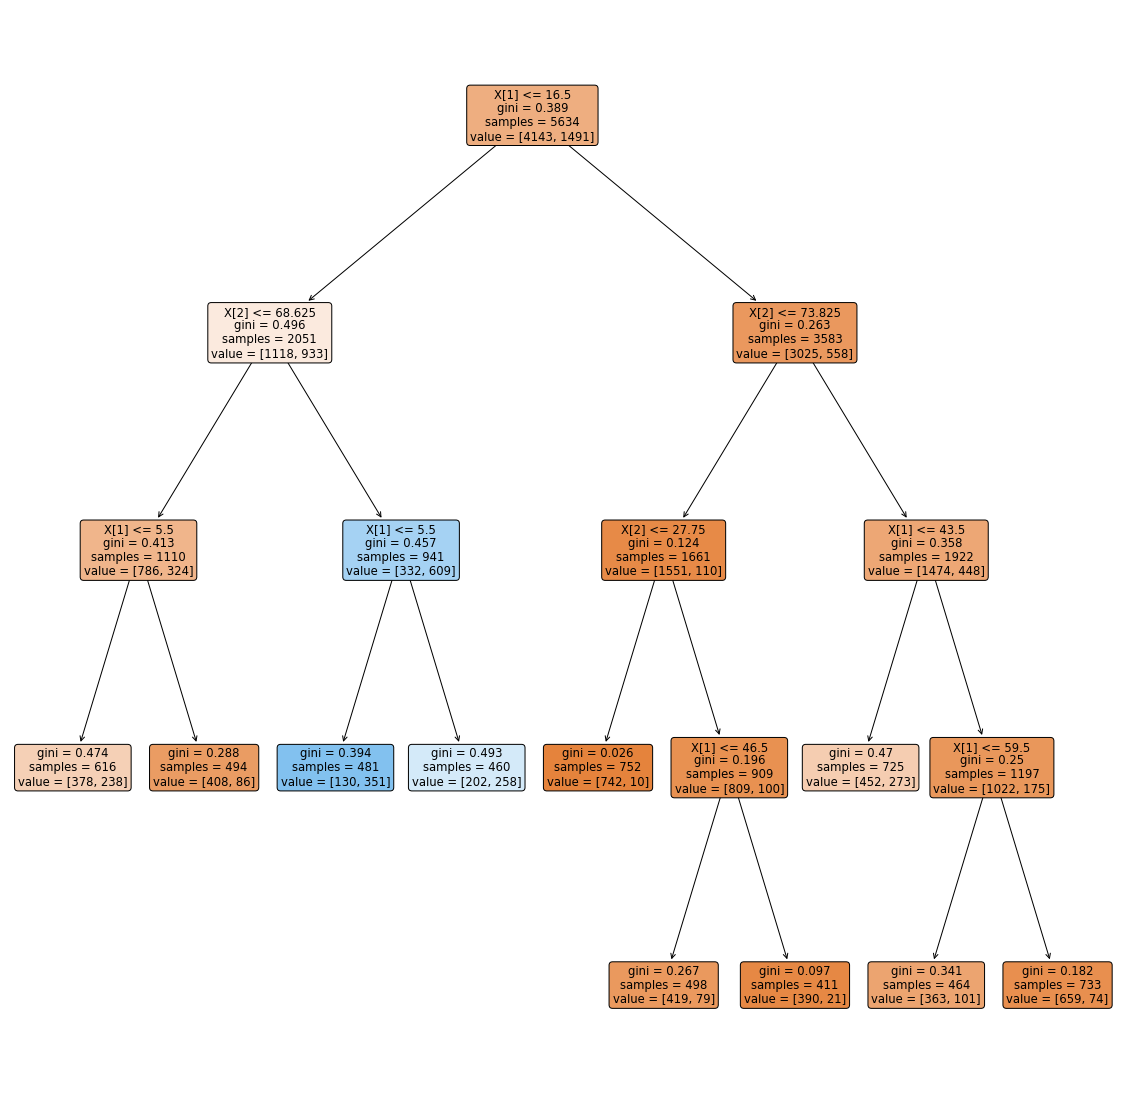

In [48]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))

plot_tree(dt,filled = True, rounded=True)
plt.show() 

In [49]:
scores=cross_val_score(dt, X_train, y_train, cv=5)
scores

array([0.77196096, 0.78881988, 0.78438332, 0.77639752, 0.78952043])

In [50]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.78 accuracy with a standard deviation of 0.01


In [52]:
y_pred = cross_val_predict(dt, X_test, y_test, cv=5)
y_pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Upsampling 

In [53]:
decision_tree = DecisionTreeClassifier()

logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()


model_pipeline = [decision_tree, logistic_regression,random_forest]
model_names = ['Decision Tree', 'Logistic Regression', 'random_forest']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'Decision Tree': 0.7307413227087112, 'Logistic Regression': 0.7905580921070258, 'random_forest': 0.7701455159251127}


,Error_metric,Train,Test
0,Accuracy,0.784523,0.784244
1,Precision,0.647184,0.672897
2,Recall,0.408451,0.380952


Confusion matrix for the train set
[[3811  882]
 [ 332  609]]


E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


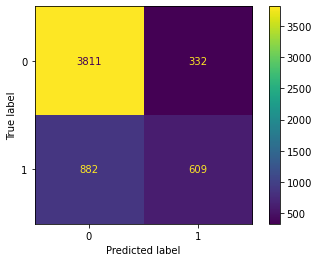



Confusion matrix for the test set
[[961 234]
 [ 70 144]]


E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


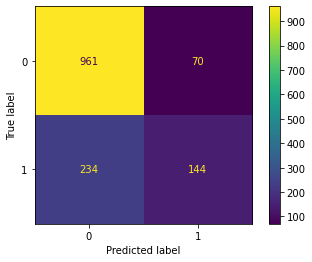

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(min_samples_leaf=400,max_depth=4)# min_samples_leaf nos indica la cantidad minima de elementos que estarán incluidos en la leaf final
                                                            # min_samples_leaf es una buena medida para evitar el overfeeting en el modelo. 
                                                            # en el modelo de regression usamos Lasso o Ridge para evitar el overfeeting
dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

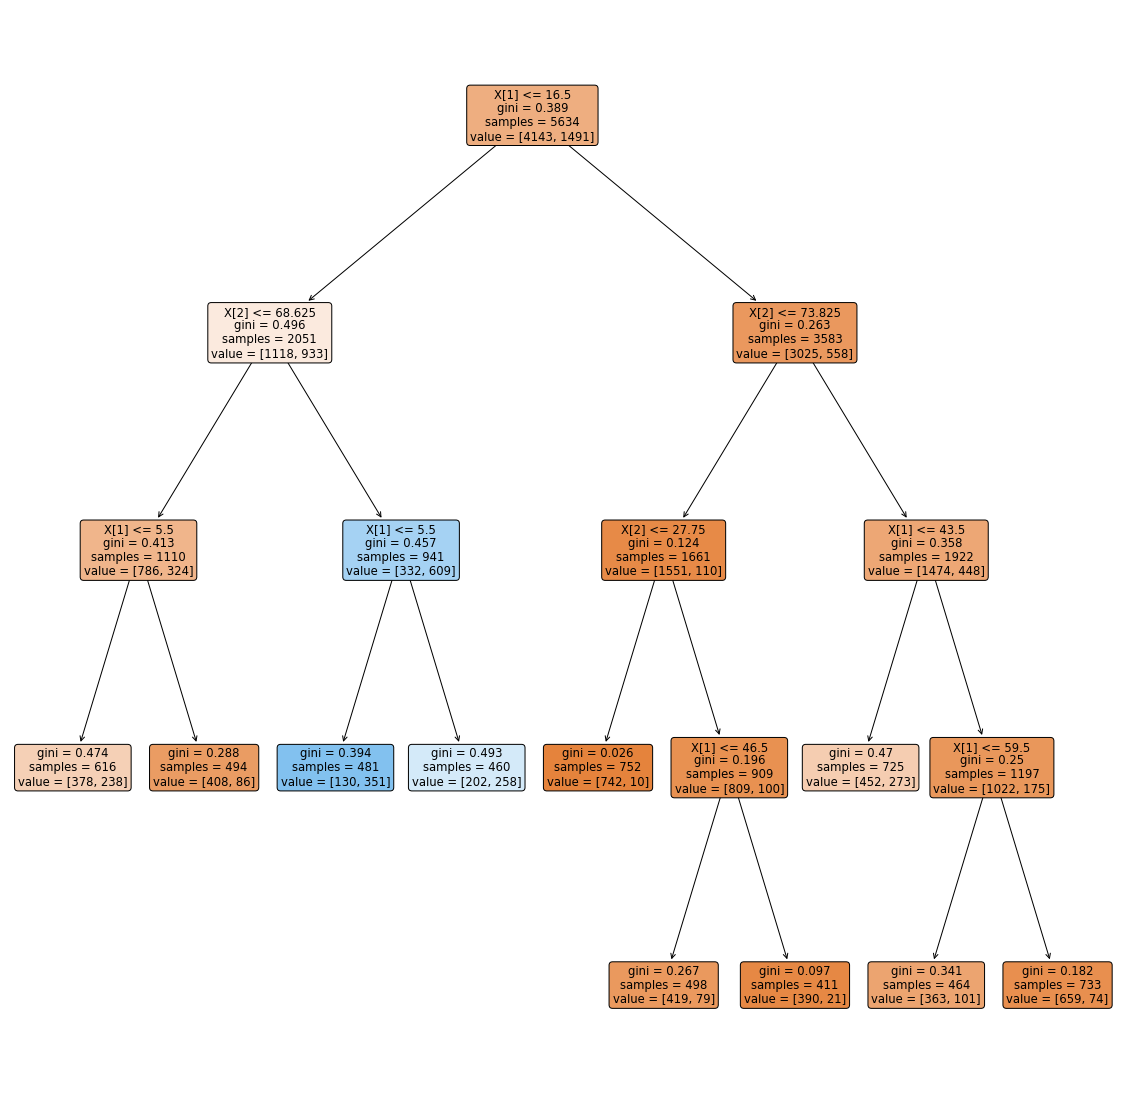

In [23]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))

plot_tree(dt,filled = True, rounded=True)
plt.show() 

In [24]:
X = churnData.drop(['Churn'], axis = 1)

In [25]:
numericalX = X.select_dtypes(np.number)
categorcalX = X.select_dtypes(np.object)

C:\Users\kondo\AppData\Local\Temp/ipykernel_5692/1508562952.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorcalX = X.select_dtypes(np.object)


In [26]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categorcalX)
encoded_categorical = encoder.transform(categorcalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [28]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [29]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kondo\AppData\Local\Temp/ipykernel_5692/3771721527.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


0.7370812038614424


E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


### Downsampling

In [30]:
Y.value_counts()

Churn
0        5174
1        1869
dtype: int64

In [31]:
category_0 = Y[Y['Churn'] == 0]
category_1 = Y[Y['Churn'] == 1]

In [32]:
category_0_down = category_0.sample(len(category_1,))

In [33]:
Y = pd.concat([category_0_down, category_1], axis=0)

In [34]:
Y.value_counts()

Churn
0        1869
1        1869
dtype: int64

In [35]:
X=X.sample(len(Y,))

In [36]:
log = LogisticRegression() 

X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.20, random_state=1000)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log.fit(X_train_mod, y_train)

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                        precision_score(y_train, y_pred_train_log),
                                        recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Error_metric,Train,Test
0,Accuracy,0.529766,0.524064
1,Precision,0.536865,0.505435
2,Recall,0.497018,0.516667


Confusion matrix for the train set
[[834 647]
 [759 750]]


E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


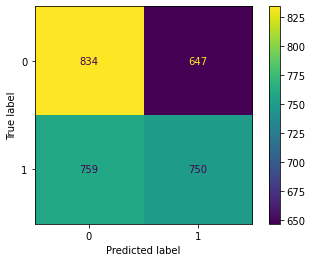



Confusion matrix for the test set
[[206 182]
 [174 186]]


E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


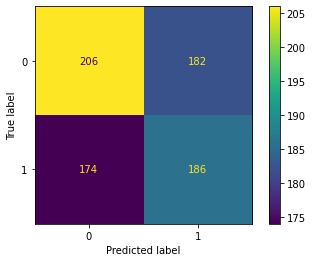

In [37]:
display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()

E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,Error_metric,Train,Test
0,Accuracy,0.556522,0.505348
1,Precision,0.577193,0.494700
2,Recall,0.438083,0.381471


E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Confusion matrix for the train set
[[1006  844]
 [ 482  658]]


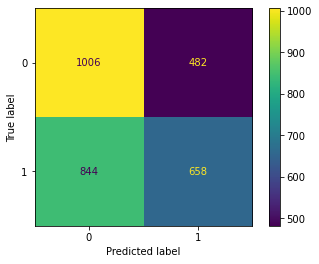



Confusion matrix for the test set
[[238 227]
 [143 140]]


E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


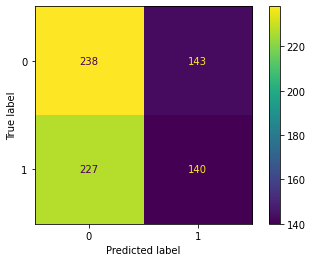

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(min_samples_leaf=100,max_depth=5)# min_samples_leaf nos indica la cantidad minima de elementos que estarán incluidos en la leaf final
                                                            # min_samples_leaf es una buena medida para evitar el overfeeting en el modelo. 
                                                            # en el modelo de regression usamos Lasso o Ridge para evitar el overfeeting
dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))


E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kondo\AppData\Local\Temp/ipykernel_5692/1379578123.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.5133689839572193


In [40]:
decision_tree = DecisionTreeClassifier()
logistic_regression = LogisticRegression()
KNN = KNeighborsRegressor()


model_pipeline = [decision_tree, logistic_regression,KNN]
model_names = ['Decision Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
E:\Anaconda\envs\DA_Envi\lib

{'Decision Tree': 0.49030100334448157, 'Logistic Regression': 0.5093645484949831, 'KNN': -0.20687932921072388}
